## Imports

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import time
from numba import njit

In [17]:
def solve_1d_nonlinearconv(u,un, nx, nt, dt, dx):
    for n in range(nt):  #iterate through time
        for i in range(nx): un[i] = u[i] ##copy the existing values of u into un
        for i in range(1, nx): #iterate through the nbr of x values 
             u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])   
    return 0

## Numba accelerator

In [19]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u,un, nx, nt, dt, dx):
    for n in range(nt):  #iterate through time
        for i in range(nx): un[i] = u[i] ##copy the existing values of u into un
        for i in range(1, nx): #iterate through the nbr of x values 
             u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])   
    return 0

## Inputs

In [20]:
nx = 61  # try changing this number from 41 to 81 and Run All ... what happens? 
dx = 2 / (nx-1)
nt = 500    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

### Initialisation

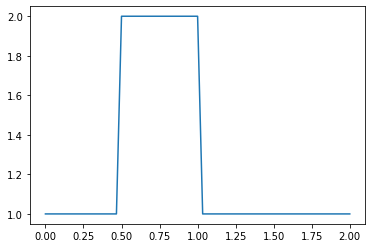

In [21]:
u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

### Call the function to solve the non linear equation

In [22]:
solve_1d_nonlinearconv(u, un, nt, nx, dt, dx)

IndexError: index 61 is out of bounds for axis 0 with size 61

### Plotting data
- Expected output:
![nonlinear](../data/Nonlinear.png)

In [2]:
plt.plot(grid,u0)
plt.plot(grid,u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Non Linear Convection') 

NameError: name 'plt' is not defined

Text(0.5, 1.0, '1D Nonlinear Convection')

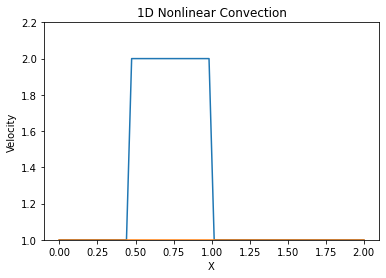

In [15]:
#I can also use this library 
import pylab as pl
pl.ion()
grid = np.linspace(0,2,nx) 
pl.plot(grid,u0)
pl.plot(grid,u) # plots all profiles on the same graph
pl.ylim([1.,2.2])
pl.xlabel('X')
pl.ylabel('Velocity')    
pl.title('1D Nonlinear Convection')

## Call Funtions using timeit 

### Pure function

In [ ]:
%timeit solve_1d_nonlinearconv(u, un, nt, nx, dt, dx)

### Function with numba accelerator

In [8]:
%timeit solve_1d_nonlinearconv_nu(u, un, nt, nx, dt, dx)